In [1]:
# we first load the module

import dipolarBEC


In [2]:
from tqdm import tqdm
import numpy as np

0.011157256512286981
200


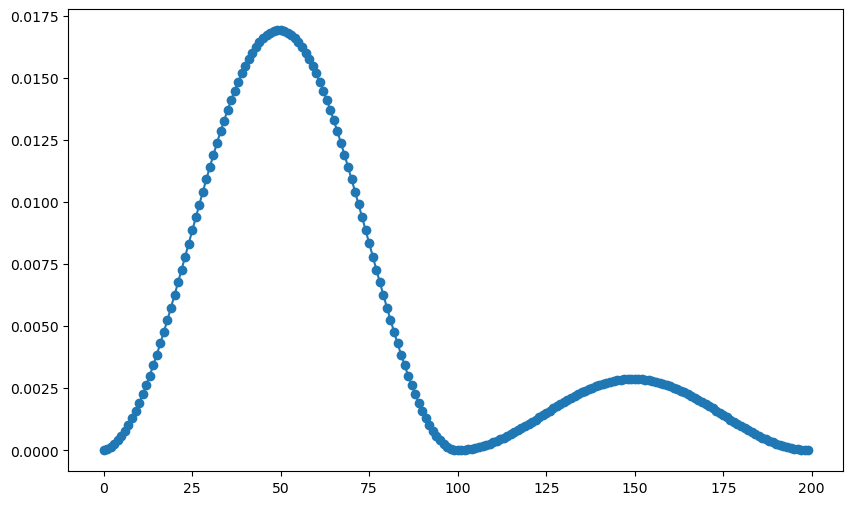

In [4]:
# first try: just run for a fixed 

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Ntubes = 100
kx = 0.1
Uc = 1.0
Ud = 0.1
Ndisr = 100
sigma = 0

run1 = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

print( run1.IPRDisr() )

def func(x, a, L):
    return a * np.exp(x/L)

xdata = range(len(run1.wfLowestState()))
ydata = run1.wfLowestState()

popt, pcov = curve_fit(func, xdata, ydata)
# Print the optimal parameters a, L
print("Optimal parameters are: a=%f, L=%f" % (popt[0], popt[1]))

plt.figure(figsize=(10,6))
plt.plot(xdata, ydata, marker='o')
plt.show()

In [4]:
# now we would like to make fancy plots

In [5]:
# load modules
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [6]:
# let us look at IPR at fix U, as a function of Ud for three values of sigma
# at small k (_sk) and large k (_lk)

sigma = 0
Ntubes = 100
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
N1=10
N2=100
N3=1000

Udar = np.linspace(0, 0.5, 11)

iprV1_sk = []
iprV2_sk = []
iprV3_sk = []

iprV1_lk = []
iprV2_lk = []
iprV3_lk = []

wf1_sk = []
wf2_sk = []
wf3_sk = []

wf1_lk = []
wf2_lk = []
wf3_lk = []


for Ud in tqdm(Udar):

    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma1)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma2)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma3)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma1)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma2)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma3)

    run1n_sk = dipolarBEC.dipolarBEC(N1, kx_small, Uc, Ud, Ndisr, sigma)
    run2n_sk = dipolarBEC.dipolarBEC(N2, kx_small, Uc, Ud, Ndisr, sigma)
    run3n_sk = dipolarBEC.dipolarBEC(N3, kx_small, Uc, Ud, Ndisr, sigma)

    run1n_lk = dipolarBEC.dipolarBEC(N1, kx_large, Uc, Ud, Ndisr, sigma)
    run2n_lk = dipolarBEC.dipolarBEC(N2, kx_large, Uc, Ud, Ndisr, sigma)
    run3n_lk = dipolarBEC.dipolarBEC(N3, kx_large, Uc, Ud, Ndisr, sigma)


    iprV1_sk.append( run1_sk.IPRDisr() )
    iprV2_sk.append( run2_sk.IPRDisr() )
    iprV3_sk.append( run3_sk.IPRDisr() )

    iprV1_lk.append( run1_lk.IPRDisr() )
    iprV2_lk.append( run2_lk.IPRDisr() )
    iprV3_lk.append( run3_lk.IPRDisr() )

    wf1_sk.append( run1n_sk.wfLowestState() )
    wf2_sk.append( run2n_sk.wfLowestState() )
    wf3_sk.append( run3n_sk.wfLowestState() )

    wf1_lk.append( run1n_lk.wfLowestState() )
    wf2_lk.append( run2n_lk.wfLowestState() )
    wf3_lk.append( run3n_lk.wfLowestState() )

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [02:45<00:00, 15.00s/it]


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(Udar , iprV1_sk, label=r'$N = 10$', marker='s')
ax1.plot(Udar , iprV2_sk, label=r'$N = 100$', marker='o')
ax1.plot(Udar , iprV3_sk, label=r'$N = 1000$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$U_d/U_c$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(Udar , iprV1_lk, label=r'$\sigma = 0$', marker='s')
ax2.plot(Udar , iprV2_lk, label=r'$\sigma = 0.25$', marker='o')
ax2.plot(Udar , iprV3_lk, label=r'$\sigma = 0.5$', marker='^')

ax2.set_xlabel(r"$U_d/U_c$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Ud.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

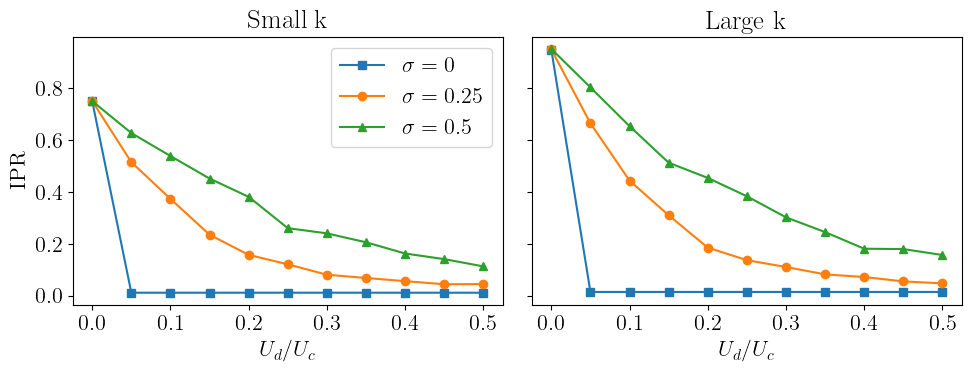

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(Udar , iprV1_sk, label=r'$\sigma = 0$', marker='s')
ax1.plot(Udar , iprV2_sk, label=r'$\sigma = 0.25$', marker='o')
ax1.plot(Udar , iprV3_sk, label=r'$\sigma = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$U_d/U_c$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(Udar , iprV1_lk, label=r'$\sigma = 0$', marker='s')
ax2.plot(Udar , iprV2_lk, label=r'$\sigma = 0.25$', marker='o')
ax2.plot(Udar , iprV3_lk, label=r'$\sigma = 0.5$', marker='^')

ax2.set_xlabel(r"$U_d/U_c$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Ud.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [8]:
# let us look at IPR at fix U, as a function of \sigma for three values of Ud
# at small k (_sk) and large k (_lk)

Ntubes = 100
kx_small = 0.01
kx_large = 10.0
Uc = 1.0
Ndisr = 100

Ud1 = 0.1
Ud2 = 0.25
Ud3 = 0.5

SigmaAr = np.linspace(0, 0.5, 11)
iprS1_sk = []
iprS2_sk = []
iprS3_sk = []

iprS1_lk = []
iprS2_lk = []
iprS3_lk = []


for sigma in tqdm(SigmaAr):
    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud1, Ndisr, sigma)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud2, Ndisr, sigma)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud3, Ndisr, sigma)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud1, Ndisr, sigma)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud2, Ndisr, sigma)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud3, Ndisr, sigma)


    iprS1_sk.append( run1_sk.IPRDisr() )
    iprS2_sk.append( run2_sk.IPRDisr() )
    iprS3_sk.append( run3_sk.IPRDisr() )

    iprS1_lk.append( run1_lk.IPRDisr() )
    iprS2_lk.append( run2_lk.IPRDisr() )
    iprS3_lk.append( run3_lk.IPRDisr() )


100%|██████████| 11/11 [02:38<00:00, 14.40s/it]


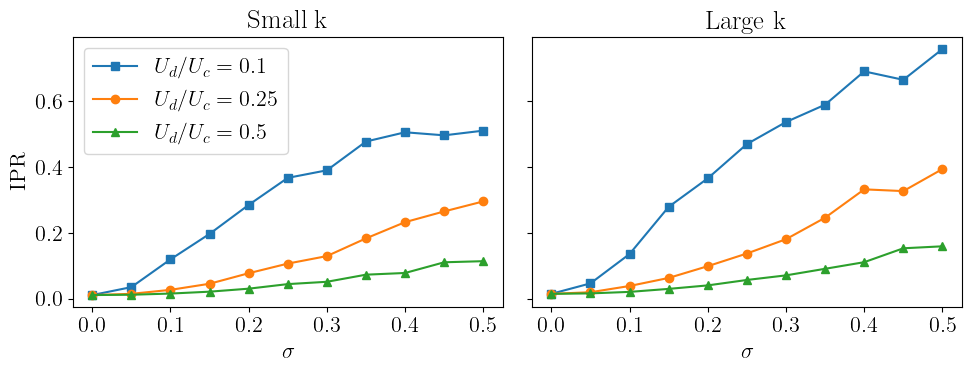

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(SigmaAr , iprS1_sk, label=r'$U_d/U_c = 0.1$', marker='s')
ax1.plot(SigmaAr , iprS2_sk, label=r'$U_d/U_c = 0.25$', marker='o')
ax1.plot(SigmaAr , iprS3_sk, label=r'$U_d/U_c = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$\sigma$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(SigmaAr , iprS1_lk, marker='s')
ax2.plot(SigmaAr , iprS2_lk, marker='o')
ax2.plot(SigmaAr , iprS3_lk, marker='^')

ax2.set_xlabel(r"$\sigma$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Sg.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [10]:
# let us look at IPR at fix U, fix Ud, as a function of Ntubes for three sigma
# at small k (_sk) and large k (_lk)

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
Ud = 0.25

NtAr = [10, 50, 100, 150, 200, 250]

sigma1 = 0.1
sigma2 = 0.25
sigma3 = 0.5

iprN1_sk = []
iprN2_sk = []
iprN3_sk = []

iprN1_lk = []
iprN2_lk = []
iprN3_lk = []


for Ntubes in tqdm(NtAr):
    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma1)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma2)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma3)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma1)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma2)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma3)


    iprN1_sk.append( run1_sk.IPRDisr() )
    iprN2_sk.append( run2_sk.IPRDisr() )
    iprN3_sk.append( run3_sk.IPRDisr() )

    iprN1_lk.append( run1_lk.IPRDisr() )
    iprN2_lk.append( run2_lk.IPRDisr() )
    iprN3_lk.append( run3_lk.IPRDisr() )


100%|██████████| 6/6 [03:02<00:00, 30.44s/it]


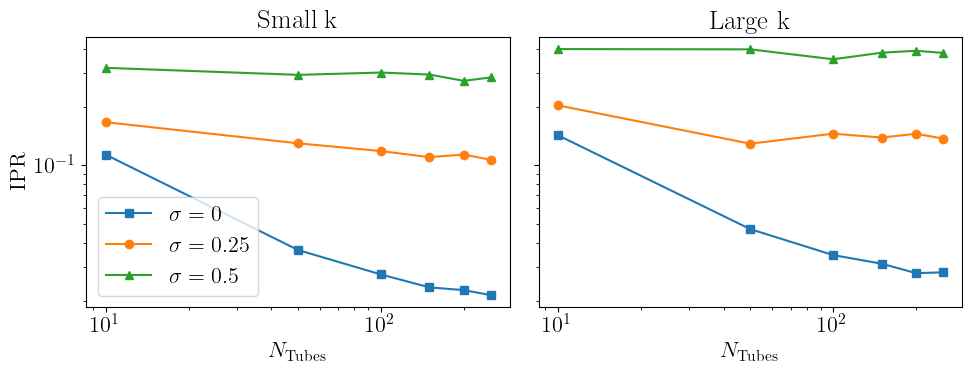

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.plot(NtAr , iprN1_sk, label=r'$\sigma = 0$', marker='s')
ax1.plot(NtAr , iprN2_sk, label=r'$\sigma = 0.25$', marker='o')
ax1.plot(NtAr , iprN3_sk, label=r'$\sigma = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$N_{\rm Tubes}$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(NtAr , iprN1_lk, marker='s')
ax2.plot(NtAr , iprN2_lk, marker='o')
ax2.plot(NtAr , iprN3_lk, marker='^')

ax2.set_xlabel(r"$N_{\rm Tubes}$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Nt.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [12]:
# fin.

[4.00000e+00 1.00000e+02 7.84000e+02 3.60000e+03 1.21000e+04 3.31240e+04
 7.84000e+04 1.66464e+05]


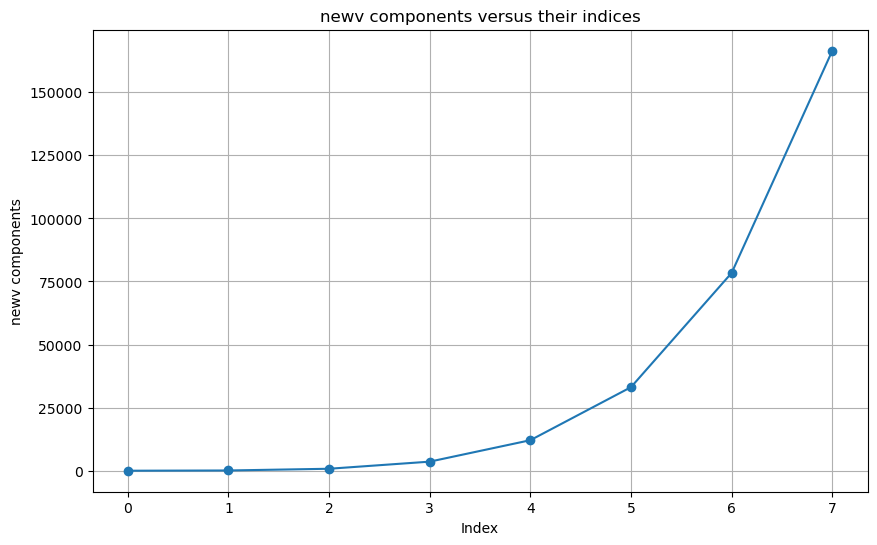

In [9]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8])
Nv = (len(v))//2
hv = np.zeros((2*Nv,2*Nv))
newv = np.zeros(Nv) 
for i in range(Nv):
    hv[i,i] = 1
    hv[i+Nv,i+Nv] = 1
    newv[i] = np.matmul(v,np.matmul(hv,v))**2

print(newv)

plt.figure(figsize=(10,6))
plt.plot(range(len(newv)), newv, marker='o')
plt.title('newv components versus their indices')
plt.xlabel('Index')
plt.ylabel('newv components')
plt.grid(True)
plt.show()
